In [1]:
!pip install seaborn==0.9.0

In [2]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
data  = pd.read_csv(uri)
data.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
swap = {
    0 : 1,
    1 : 0
}
data['finished'] = data.unfinished.map(swap)
data.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [4]:
data.tail()

,unfinished,expected_hours,price,finished
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


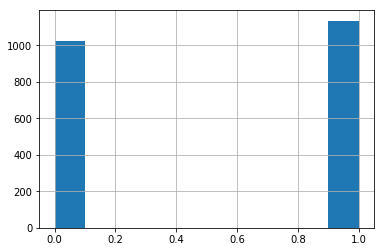

In [5]:
data.finished.hist()

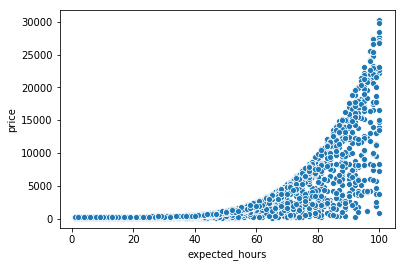

In [6]:
import seaborn as sns

sns.scatterplot(x="expected_hours",y="price",data=data)

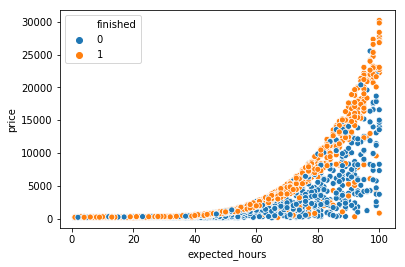

In [7]:
sns.scatterplot(x="expected_hours",y="price",
                hue="finished",
                data=data)

# Trying to run our basic model

In [0]:
x = data[["expected_hours","price"]]
y = data["finished"]

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 20
np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25,
                                                        stratify=y)
print("Train set lenght %d and test set lenght %d" % (len(train_x), len(test_x)))

model = LinearSVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("Accuracy %.2f%%"% accuracy)

Train set lenght 1617 and test set lenght 540
Accuracy 48.89%


In [36]:
baseline_predictions = np.ones(540)
baseline_accuracy = accuracy_score(test_y, guilherme_predictions) * 100
print("Baseline Accuracy %.2f%%"% baseline_accuracy)

Baseline Accuracy 52.59%


# Exploring the test

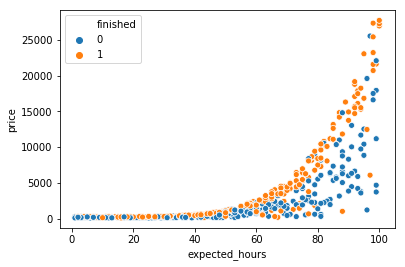

In [37]:
sns.scatterplot(x=test_x.expected_hours, y=test_x.price,
                hue=test_y)

In [62]:
x_min = test_x.expected_hours.min()
x_max = test_x.expected_hours.max()
y_min = test_x.price.min()
y_max = test_x.price.max()
print(x_min, x_max, y_min, y_max)

1 100 101 27738


In [0]:
pixels = 100
x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixels)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [0]:
xx, yy = np.meshgrid(x_axis, y_axis)
points = np.c_[xx.ravel(), yy.ravel()]

In [82]:
Z = model.predict(points)
Z = Z.reshape(xx.shape)
Z.shape
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

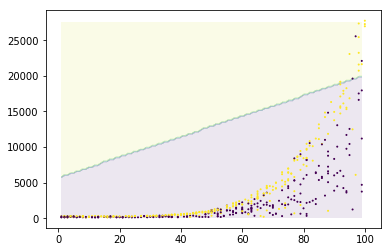

In [87]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.1)
plt.scatter(test_x.expected_hours, test_x.price, c=test_y, s=1)